# ACS Data Sharing
# Utility of Private Data

In this workbook we consider how utility may vary as features are added to a data set.

Some features may disclose private information, and we need to consider the tradeoff between privacy and utility.

We run experiments using prediction models (regressors) to look at the predictive performance using various features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

## Dataset
We use the Inmate Admissions dataset.

In [2]:
data = pd.read_csv("Inmate_Admissions.csv", parse_dates=['ADMITTED_DT','DISCHARGED_DT'])

In [3]:
data.head()

,INMATEID,ADMITTED_DT,DISCHARGED_DT,RACE,GENDER,INMATE_STATUS_CODE,TOP_CHARGE
0,10001993,2018-01-22 18:32:26,NaT,BLACK,M,DE,220.39
1,70983,2018-01-02 19:05:00,2018-01-10 20:17:00,UNKNOWN,M,DE,NaN
2,2744,2018-01-18 17:40:04,NaT,UNKNOWN,M,DE,140.20
3,20165517,2018-01-09 12:18:49,NaT,UNKNOWN,M,DE,110-120.05
4,20078557,2018-01-15 11:21:00,NaT,BLACK,M,DE,155.25


In [4]:
data.describe()

,INMATEID
count,3.017470e+05
mean,1.273267e+07
std,9.537441e+06
min,1.700000e+01
25%,1.073410e+05
50%,2.007140e+07
75%,2.015021e+07
max,2.020468e+07


In [5]:
data.count()

INMATEID              301747
ADMITTED_DT           301747
DISCHARGED_DT         262923
RACE                  301747
GENDER                300999
INMATE_STATUS_CODE    301747
TOP_CHARGE             92530
dtype: int64

In [6]:
# Drop rows where NaT in DISCHARGED_DT
df = data.dropna(subset=['DISCHARGED_DT'])   #Drop only if NaN in specific column (as asked in the question)

In [7]:
df.count()

INMATEID              262923
ADMITTED_DT           262923
DISCHARGED_DT         262923
RACE                  262923
GENDER                262244
INMATE_STATUS_CODE    262923
TOP_CHARGE             60602
dtype: int64

In [8]:
df.head()

,INMATEID,ADMITTED_DT,DISCHARGED_DT,RACE,GENDER,INMATE_STATUS_CODE,TOP_CHARGE
1,70983,2018-01-02 19:05:00,2018-01-10 20:17:00,UNKNOWN,M,DE,NaN
7,20191524,2018-01-25 01:33:00,2018-01-29 15:43:00,BLACK,M,DE,NaN
8,20190871,2018-01-07 12:20:53,2018-01-08 00:52:03,UNKNOWN,M,DE,NaN
10,20150795,2018-01-12 19:40:44,2018-01-18 04:12:05,UNKNOWN,M,DE,NaN
12,43936,2018-01-09 03:33:54,2018-01-09 15:49:05,UNKNOWN,M,DE,NaN


<function seaborn.utils.despine>

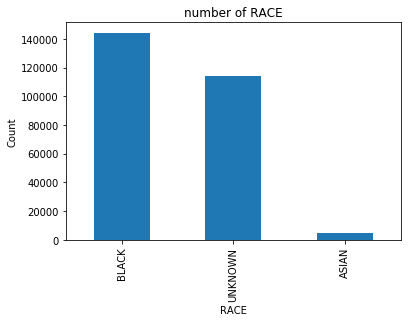

In [9]:
df['RACE'].value_counts().plot(kind='bar')
plt.title('number of RACE')
plt.xlabel('RACE')
plt.ylabel('Count')
sns.despine

<function seaborn.utils.despine>

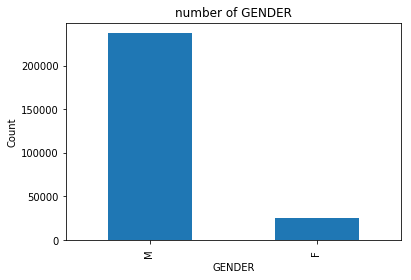

In [10]:
df['GENDER'].value_counts().plot(kind='bar')
plt.title('number of GENDER')
plt.xlabel('GENDER')
plt.ylabel('Count')
sns.despine

<function seaborn.utils.despine>

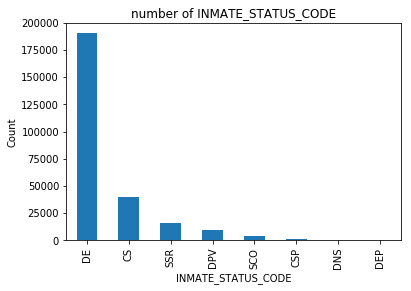

In [11]:
df['INMATE_STATUS_CODE'].value_counts().plot(kind='bar')
plt.title('number of INMATE_STATUS_CODE')
plt.xlabel('INMATE_STATUS_CODE')
plt.ylabel('Count')
sns.despine

<function seaborn.utils.despine>

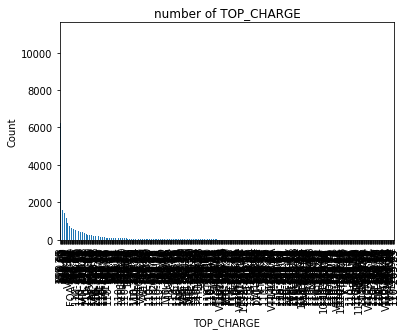

In [12]:
df['TOP_CHARGE'].value_counts().plot(kind='bar')
plt.title('number of TOP_CHARGE')
plt.xlabel('TOP_CHARGE')
plt.ylabel('Count')
sns.despine

In [13]:
df[:10]

,INMATEID,ADMITTED_DT,DISCHARGED_DT,RACE,GENDER,INMATE_STATUS_CODE,TOP_CHARGE
1,70983,2018-01-02 19:05:00,2018-01-10 20:17:00,UNKNOWN,M,DE,NaN
7,20191524,2018-01-25 01:33:00,2018-01-29 15:43:00,BLACK,M,DE,NaN
8,20190871,2018-01-07 12:20:53,2018-01-08 00:52:03,UNKNOWN,M,DE,NaN
10,20150795,2018-01-12 19:40:44,2018-01-18 04:12:05,UNKNOWN,M,DE,NaN
12,43936,2018-01-09 03:33:54,2018-01-09 15:49:05,UNKNOWN,M,DE,NaN
14,64122,2018-01-05 19:28:45,2018-01-26 09:29:01,BLACK,M,CSP,120.00
15,165663,2018-01-12 11:50:33,2018-01-12 14:20:05,BLACK,M,DE,NaN
17,23108,2018-01-06 14:12:29,2018-01-09 22:45:00,BLACK,M,DE,NaN
18,20190837,2018-01-05 20:08:28,2018-01-06 00:05:03,UNKNOWN,M,DE,NaN
19,20147879,2018-01-26 11:32:16,2018-01-28 17:13:02,BLACK,M,CS,VTL 1192.2


## Derived Features
Derived features can aid prediction.

For instance, from the admission data, we can look at:
- hour of admission
- day of week of admission

In [14]:
df['duration'] = df['DISCHARGED_DT'] - df['ADMITTED_DT']

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df['duration_days'] = df['duration'].apply(lambda x: x.days)

df['admission_year'] = df['ADMITTED_DT'].apply(lambda x: x.year)
df['admission_month'] = df['ADMITTED_DT'].apply(lambda x: x.month)
df['admission_day'] = df['ADMITTED_DT'].apply(lambda x: x.day)
df['admission_hr'] = df['ADMITTED_DT'].apply(lambda x: x.hour)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWa

In [16]:
df['admission_dayofweek'] = df['ADMITTED_DT'].apply(lambda x: x.dayofweek)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
#plt.scatter(df['at_int'],df['duration'])
#plt.title("Duration?")

In [18]:
df['at_int'] = pd.to_timedelta(df.ADMITTED_DT).dt.total_seconds()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
df.head()

,INMATEID,ADMITTED_DT,DISCHARGED_DT,RACE,GENDER,INMATE_STATUS_CODE,TOP_CHARGE,duration,duration_days,admission_year,admission_month,admission_day,admission_hr,admission_dayofweek,at_int
1,70983,2018-01-02 19:05:00,2018-01-10 20:17:00,UNKNOWN,M,DE,NaN,8 days 01:12:00,8,2018,1,2,19,1,1.514920e+09
7,20191524,2018-01-25 01:33:00,2018-01-29 15:43:00,BLACK,M,DE,NaN,4 days 14:10:00,4,2018,1,25,1,3,1.516844e+09
8,20190871,2018-01-07 12:20:53,2018-01-08 00:52:03,UNKNOWN,M,DE,NaN,0 days 12:31:10,0,2018,1,7,12,6,1.515328e+09
10,20150795,2018-01-12 19:40:44,2018-01-18 04:12:05,UNKNOWN,M,DE,NaN,5 days 08:31:21,5,2018,1,12,19,4,1.515786e+09
12,43936,2018-01-09 03:33:54,2018-01-09 15:49:05,UNKNOWN,M,DE,NaN,0 days 12:15:11,0,2018,1,9,3,1,1.515469e+09


# Models
We begin by building sample models from our data.  We will build:
- Linear Regression
- Gradient Boosting

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [21]:
labels = df['duration_days']
#inputs = df.drop(['INMATEID', 'ADMITTED_DT', 'DISCHARGED_DT', 'duration', 'duration_days', 'at_int', 'TOP_CHARGE'],axis=1)
inputs = df.drop(['INMATEID', 'ADMITTED_DT', 'GENDER', 'DISCHARGED_DT', 'duration', 'duration_days', 'at_int', 'TOP_CHARGE'],axis=1)

In [22]:
#inputs.GENDER.unique()

In [23]:
inputs.RACE.unique()

array(['UNKNOWN', 'BLACK', 'ASIAN'], dtype=object)

In [25]:
#inputs['GENDER'] = inputs['GENDER'].fillna('NONE')

In [26]:
le = LabelEncoder()
#inputs['GENDER'] = le.fit_transform(inputs['GENDER'])
inputs['RACE'] = le.fit_transform(inputs['RACE'])
inputs['INMATE_STATUS_CODE'] = le.fit_transform(inputs['INMATE_STATUS_CODE'])

In [27]:
inputs.head()

,RACE,INMATE_STATUS_CODE,admission_year,admission_month,admission_day,admission_hr,admission_dayofweek
1,2,2,2018,1,2,19,1
7,1,2,2018,1,25,1,3
8,2,2,2018,1,7,12,6
10,2,2,2018,1,12,19,4
12,2,2,2018,1,9,3,1


In [28]:
labels.head()

1     8
7     4
8     0
10    5
12    0
Name: duration_days, dtype: int64

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
reg = LinearRegression()

In [31]:
from sklearn.cross_validation import train_test_split

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
x_train , x_test , y_train , y_test = train_test_split(inputs , labels , test_size = 0.10,random_state =2)

In [33]:
x_train.head()

,RACE,INMATE_STATUS_CODE,admission_year,admission_month,admission_day,admission_hr,admission_dayofweek
216319,2,2,2014,10,17,16,4
268539,1,7,2017,2,24,1,4
65963,1,2,2014,2,3,17,0
148213,1,2,2014,2,21,23,4
64905,2,7,2014,5,19,14,0


In [34]:
reg.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
reg.score(x_test,y_test)

0.11082541327255024

In [36]:
from sklearn import ensemble
gbm = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [37]:
gbm.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [38]:
gbm.score(x_test,y_test)

0.3007339385967075

# Experiments
An experiment is executing model for a given selection of features to predict a label.

For each experiment we calculate a model score using a variety of models
- Linear regression
- Gradient Boosting

We setup an array of experiments, and can iterate through each one.

In [39]:
# Reset the results, subsequent calls to run experiment will append new results
exp_results = []

In [40]:
# We setup a list of experiments, defining which features to include.
experiments = [
#0
    {
        "description" : '0 - fewest features, private, little utlility',
        "label" : 'duration_days',
        "inputs" : ['RACE', 'GENDER']
    },

#1
    {
        "description" : '1a - Inmate status adds value',
        "label" : 'duration_days',
        "inputs" : ['RACE', 'INMATE_STATUS_CODE']
    },


#2
    {
        "description" : '1b - Inmate status adds value',
        "label" : 'duration_days',
        "inputs" : ['GENDER', 'INMATE_STATUS_CODE']
    },
#3    
    {
        "description" : '3 - include 3 static features',
        "label" : 'duration_days',
        "inputs" : ['RACE', 'GENDER', 'INMATE_STATUS_CODE']
    },

#4
    {
        "description" : '4 - include derived feature',
        "label" : 'duration_days',
        "inputs" : ['RACE', 'GENDER', 'INMATE_STATUS_CODE','admission_hr']
    },

#5
    {
        "description" : '5 -include derived feature (3 + admission_dayofweek)',
        "label" : 'duration_days',
        "inputs" : ['RACE', 'GENDER', 'INMATE_STATUS_CODE','admission_dayofweek']
    },
    
#6
    {
        "description" : '6 - include derived feature (4 + admission_dayofweek)',
        "label" : 'duration_days',
        "inputs" : ['RACE', 'GENDER', 'INMATE_STATUS_CODE','admission_hr','admission_dayofweek']
    },
    

]


In [41]:
def run_experiment(experiment):
    print('Experiment:',experiment['description'])
    #print(df.columns)
    input_cols = list(set(df.columns) - set(experiment['inputs']))
    
    # Setup data
    labels = df['duration_days']
    inputs = df.drop(input_cols,axis=1)
    #print(inputs.head())

    # Encode categoricals
    le = LabelEncoder()
    
    if 'GENDER' in experiment['inputs']:
        inputs['GENDER'] = inputs['GENDER'].fillna('NONE')
    

    categoricals = ['GENDER','RACE','INMATE_STATUS_CODE']
    for col in categoricals:
        if col in experiment['inputs']:
            inputs[col] = le.fit_transform(inputs[col])
    
    #print(inputs.head())

    # Split data
    x_train , x_test , y_train , y_test = train_test_split(inputs , labels , test_size = 0.10,random_state =2)

    # run linear regression
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    lr_score = reg.score(x_test,y_test)    
    print(' lr_score=', lr_score)

    
    # run GBM
    gbm = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')    
    gbm.fit(x_train, y_train)  
    gbm_score = gbm.score(x_test,y_test)
    
    print(' gbm_score=', gbm_score )
    
    # Summarise results
    exp_results.append({
        "description" : experiment['description'],
        "inputs" : experiment['inputs'],
        "label" : experiment['label'],
        "dropped" : input_cols,
        "lr_score" : lr_score,
        "gbm_score" : gbm_score,
        })



In [42]:
experiments[6]

{'description': '6 - include derived feature (4 + admission_dayofweek)',
 'inputs': ['RACE',
  'GENDER',
  'INMATE_STATUS_CODE',
  'admission_hr',
  'admission_dayofweek'],
 'label': 'duration_days'}

In [43]:
run_experiment(experiments[6])

Experiment: 6 - include derived feature (4 + admission_dayofweek)
 lr_score= 0.092457104193
 gbm_score= 0.258304775693


## Review Experiment Results
Tabularise the results in a dataframe

In [44]:
exp_results_df = pd.DataFrame(exp_results)

In [45]:
exp_results_df

,description,dropped,gbm_score,inputs,label,lr_score
0,6 - include derived feature (4 + admission_day...,"[admission_day, TOP_CHARGE, admission_month, a...",0.258305,"[RACE, GENDER, INMATE_STATUS_CODE, admission_h...",duration_days,0.092457


## Rerun All Experiments
Will iterate through all experiments, regenerating results from scratch.

Could take a while to execute. 1-2 min per experiment.

In [46]:
exp_results = []
for experiment in experiments:
    run_experiment(experiment)

Experiment: 0 - fewest features, private, little utlility
 lr_score= 0.00206026922205
 gbm_score= 0.00331552832278
Experiment: 1a - Inmate status adds value
 lr_score= 0.0913460881633
 gbm_score= 0.223743753532
Experiment: 1b - Inmate status adds value
 lr_score= 0.0922310083555
 gbm_score= 0.223343394473
Experiment: 3 - include 3 static features
 lr_score= 0.0923225418402
 gbm_score= 0.224959098662
Experiment: 4 - include derived feature
 lr_score= 0.0923433524616
 gbm_score= 0.242241651007
Experiment: 5 -include derived feature (3 + admission_dayofweek)
 lr_score= 0.0924437281744
 gbm_score= 0.242568845379
Experiment: 6 - include derived feature (4 + admission_dayofweek)
 lr_score= 0.092457104193
 gbm_score= 0.258308560342
